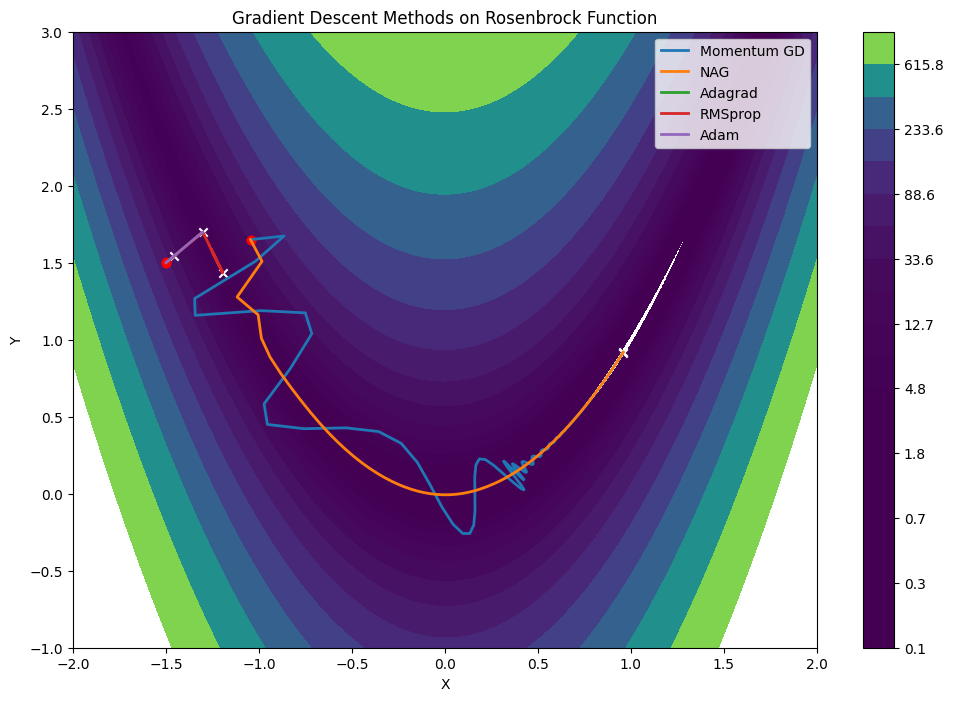

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])

# Optimization parameters
learning_rate = 0.001
beta = 0.9
iterations = 500
start_point = np.array([-1.5, 1.5])

# Methods to compare
methods = ['Momentum GD', 'NAG', 'Adagrad', 'RMSprop', 'Adam']
trajectories = {method: [] for method in methods}

# Momentum Gradient Descent
velocity = np.zeros(2)
pos = start_point.copy()
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    velocity = beta * velocity - learning_rate * grad
    pos += velocity
    trajectories['Momentum GD'].append(pos.copy())

# Nesterov Accelerated Gradient (NAG)
velocity = np.zeros(2)
pos = start_point.copy()
for _ in range(iterations):
    lookahead = pos + beta * velocity
    grad = rosenbrock_grad(*lookahead)
    velocity = beta * velocity - learning_rate * grad
    pos += velocity
    trajectories['NAG'].append(pos.copy())

# Adagrad
pos = start_point.copy()
grad_accum = np.zeros(2)
epsilon = 1e-8
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    grad_accum += grad**2
    pos -= (learning_rate / (np.sqrt(grad_accum) + epsilon)) * grad
    trajectories['Adagrad'].append(pos.copy())

# RMSprop
pos = start_point.copy()
grad_accum = np.zeros(2)
decay_rate = 0.9
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    grad_accum = decay_rate * grad_accum + (1 - decay_rate) * grad**2
    pos -= (learning_rate / (np.sqrt(grad_accum) + epsilon)) * grad
    trajectories['RMSprop'].append(pos.copy())

# Adam
pos = start_point.copy()
m, v = np.zeros(2), np.zeros(2)
beta1, beta2 = 0.9, 0.999
for t in range(1, iterations + 1):
    grad = rosenbrock_grad(*pos)
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    pos -= (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat
    trajectories['Adam'].append(pos.copy())

# Convert trajectories to numpy arrays
for method in methods:
    trajectories[method] = np.array(trajectories[method])

# Plot contours of Rosenbrock function
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar()

# Plot trajectories
for method in methods:
    plt.plot(trajectories[method][:, 0], trajectories[method][:, 1], label=method, linewidth=2)
    plt.scatter(*trajectories[method][0], color='red', marker='o')  # Start point
    plt.scatter(*trajectories[method][-1], color='white', marker='x')  # End point

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent Methods on Rosenbrock Function')
plt.legend()
plt.show()


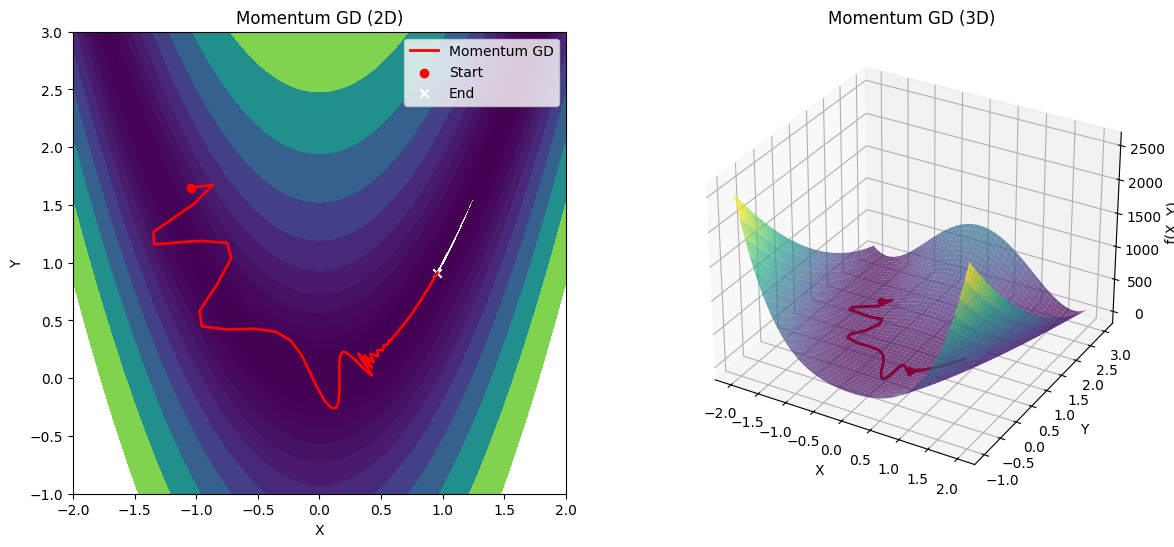

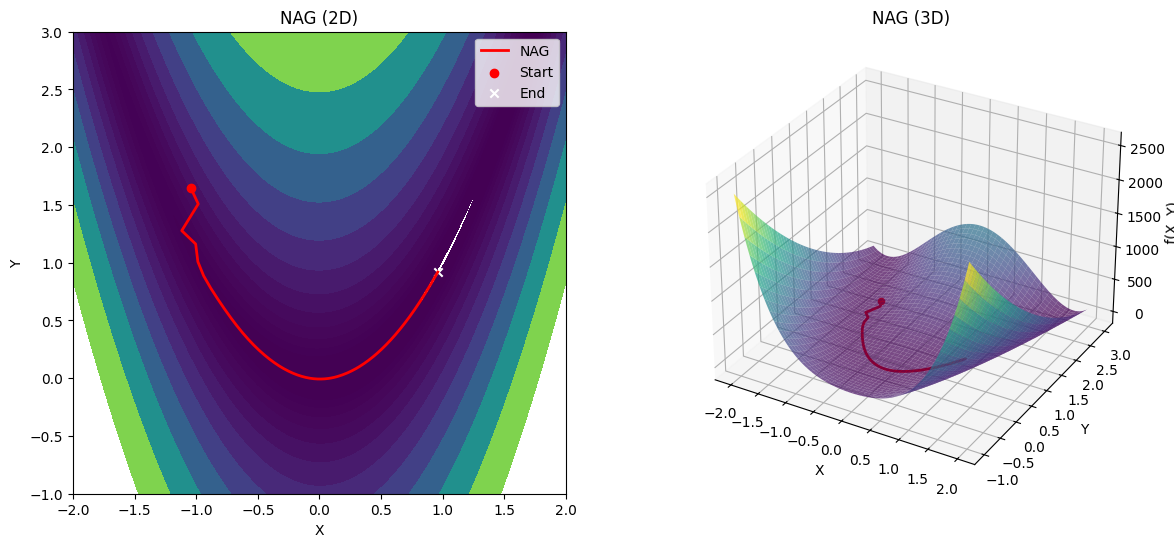

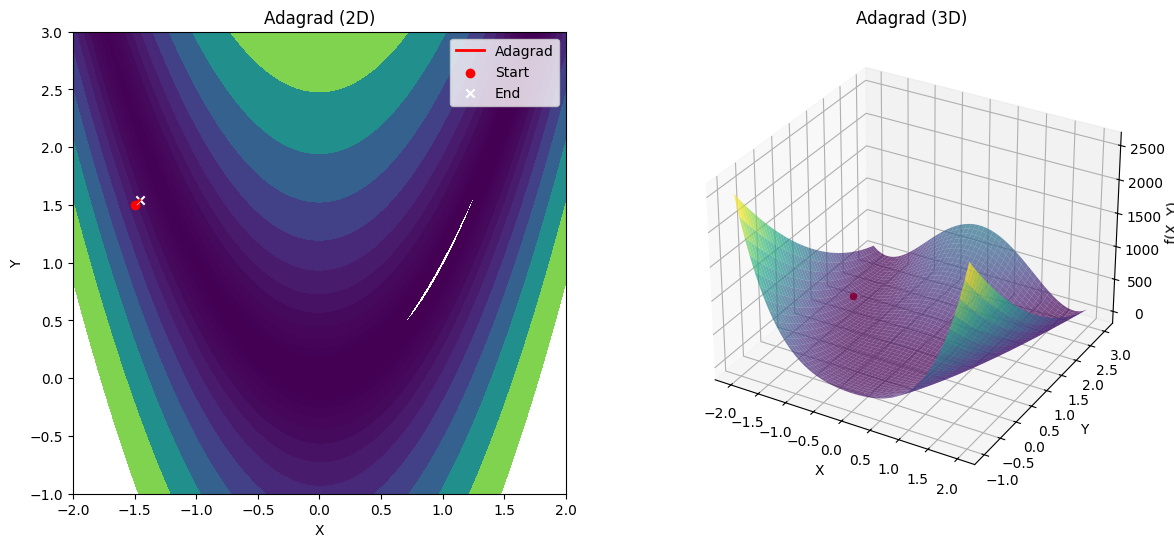

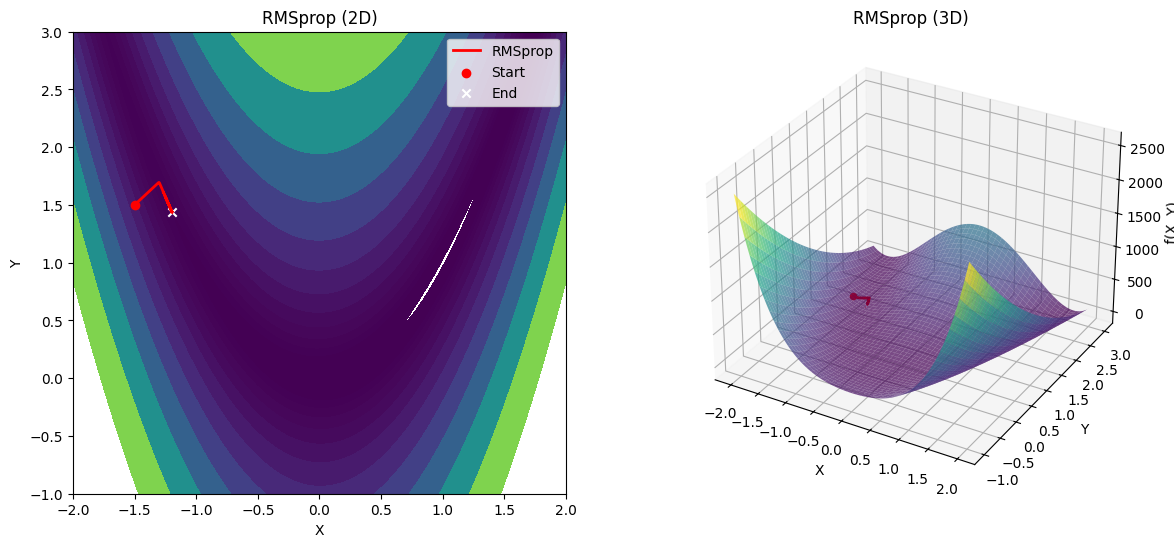

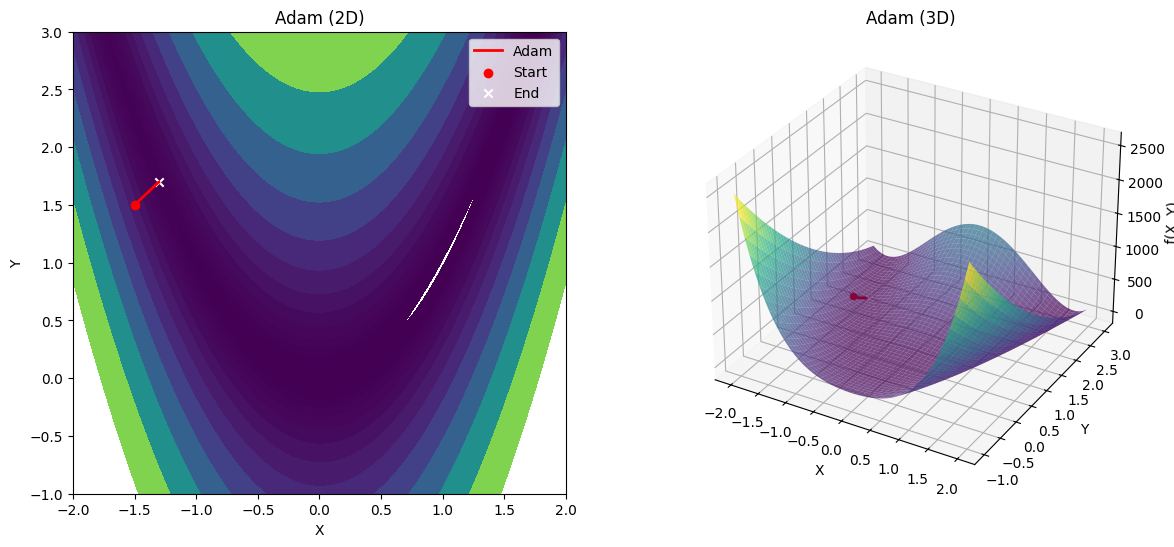

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])

# Optimization parameters
learning_rate = 0.001
beta = 0.9
iterations = 500
start_point = np.array([-1.5, 1.5])

# Methods to compare
methods = ['Momentum GD', 'NAG', 'Adagrad', 'RMSprop', 'Adam']
trajectories = {method: [] for method in methods}

# Momentum Gradient Descent
velocity = np.zeros(2)
pos = start_point.copy()
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    velocity = beta * velocity - learning_rate * grad
    pos += velocity
    trajectories['Momentum GD'].append(pos.copy())

# Nesterov Accelerated Gradient (NAG)
velocity = np.zeros(2)
pos = start_point.copy()
for _ in range(iterations):
    lookahead = pos + beta * velocity
    grad = rosenbrock_grad(*lookahead)
    velocity = beta * velocity - learning_rate * grad
    pos += velocity
    trajectories['NAG'].append(pos.copy())

# Adagrad
pos = start_point.copy()
grad_accum = np.zeros(2)
epsilon = 1e-8
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    grad_accum += grad**2
    pos -= (learning_rate / (np.sqrt(grad_accum) + epsilon)) * grad
    trajectories['Adagrad'].append(pos.copy())

# RMSprop
pos = start_point.copy()
grad_accum = np.zeros(2)
decay_rate = 0.9
for _ in range(iterations):
    grad = rosenbrock_grad(*pos)
    grad_accum = decay_rate * grad_accum + (1 - decay_rate) * grad**2
    pos -= (learning_rate / (np.sqrt(grad_accum) + epsilon)) * grad
    trajectories['RMSprop'].append(pos.copy())

# Adam
pos = start_point.copy()
m, v = np.zeros(2), np.zeros(2)
beta1, beta2 = 0.9, 0.999
for t in range(1, iterations + 1):
    grad = rosenbrock_grad(*pos)
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    pos -= (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat
    trajectories['Adam'].append(pos.copy())

# Convert trajectories to numpy arrays
for method in methods:
    trajectories[method] = np.array(trajectories[method])

# Save trajectories
np.save("trajectories.npy", trajectories)

# Create mesh grid for visualization
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Function to plot optimization paths in 2D and 3D
def plot_optimization(method, trajectory):
    fig = plt.figure(figsize=(14, 6))

    # 2D Contour Plot
    ax_2d = fig.add_subplot(121)
    ax_2d.contourf(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    ax_2d.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2, label=method)
    ax_2d.scatter(*trajectory[0], color='red', marker='o', label='Start')  # Start point
    ax_2d.scatter(*trajectory[-1], color='white', marker='x', label='End')  # End point
    ax_2d.set_xlabel("X")
    ax_2d.set_ylabel("Y")
    ax_2d.set_title(f'{method} (2D)')
    ax_2d.legend()

    # 3D Surface Plot
    ax_3d = fig.add_subplot(122, projection='3d')
    ax_3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    ax_3d.plot(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]),
               'r-', linewidth=2, label=method)
    ax_3d.scatter(*trajectory[0], rosenbrock(*trajectory[0]), color='red', marker='o')  # Start point
    ax_3d.scatter(*trajectory[-1], rosenbrock(*trajectory[-1]), color='white', marker='x')  # End point
    ax_3d.set_xlabel("X")
    ax_3d.set_ylabel("Y")
    ax_3d.set_zlabel("f(X, Y)")
    ax_3d.set_title(f'{method} (3D)')

    plt.show()

# Generate separate plots for each optimization method
for method in methods:
    plot_optimization(method, np.array(trajectories[method]))
